In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


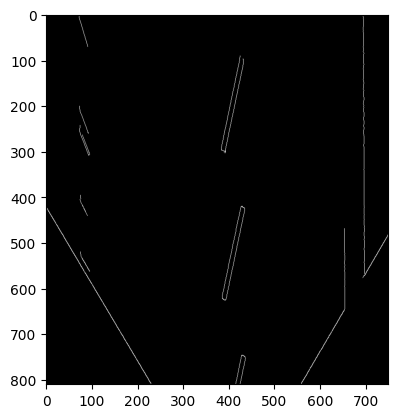

In [76]:
# %%timeit
img = cv2.imread('./imgs/angle_20_speed_5_29.png') # Read the test img
IMAGE_H = img.shape[0]
IMAGE_W = img.shape[1]

src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, IMAGE_H // 10], [IMAGE_W, IMAGE_H // 10]])
dst = np.float32([[569, IMAGE_H], [711, IMAGE_H], [0, 0], [IMAGE_W, 0]])

M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
# Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

img = img[500:(IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop
warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping
warped_img = warped_img[0:IMAGE_H-150, 250:1000]

def apply_gaussian_blur(img, kernel_size=(5, 5)):
    return cv2.GaussianBlur(img, kernel_size, 0)

def apply_canny_edge(img, low_threshold=100, high_threshold=200):
    return cv2.Canny(img, low_threshold, high_threshold)

warped_img = apply_gaussian_blur(warped_img)
warped_img = apply_canny_edge(warped_img)

plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)) # Show results
